## Importing and installing necessary libraries

Installing libraries

In [2]:
# Run these lines only once

# !pip install statsmodels
# !pip install xlrd
# !pip install mlxtend

Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

Importing dataset

In [4]:
df=pd.read_excel('Concrete_Data.xls')

## Exploratory data analysis

Viewing first 5 rows

In [5]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


Dimension of the Dataset

In [6]:
df.shape

(1030, 9)

Some basic information of the dataset:-

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

* There are 8 variables which are of float type and 1 variable which is of integer type.

Checking if there is any missing value

In [8]:
df.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

* There is no missing value in the data.

Data description
Here the description contains:-
* the number of observations - count
* mean - mean
* standard deviation - std
* minimum value - min
* 1st quartile - 25%
* 2nd quartile (median) - 50%
* 3rd quartile - 75%
* maximum value - max

In [9]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


**Pictorial visualization** of correlation between the variables present in the dataset

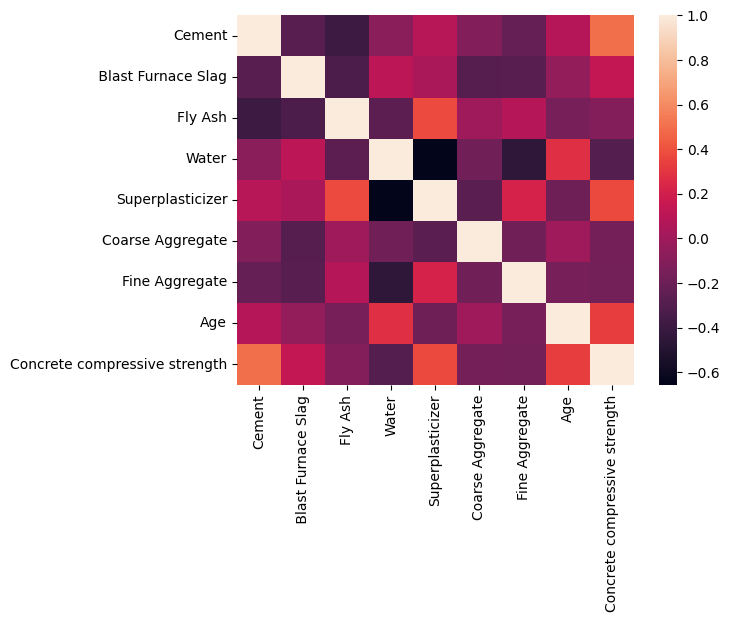

In [10]:
sns.heatmap(df.corr(),xticklabels=['Cement', ' Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer','Coarse Aggregate','Fine Aggregate','Age','Concrete compressive strength'],yticklabels=['Cement', ' Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer','Coarse Aggregate','Fine Aggregate','Age','Concrete compressive strength'])
plt.savefig('Plot_1.eps')

* The more the color lightens, the more the correlation becomes positive. Similarly, The more the color darkens, the more the correlation becomes negative.

**Correlation matrix**

In [11]:
df.corr()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
Cement (component 1)(kg in a m^3 mixture),1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947,0.497833
Blast Furnace Slag (component 2)(kg in a m^3 mixture),-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246,0.134824
Fly Ash (component 3)(kg in a m^3 mixture),-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370,-0.105753
Water (component 4)(kg in a m^3 mixture),-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
Superplasticizer (component 5)(kg in a m^3 mixture),0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717,0.366102
Coarse Aggregate (component 6)(kg in a m^3 mixture),-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016,-0.164928
Fine Aggregate (component 7)(kg in a m^3 mixture),-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094,-0.167249
Age (day),0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000,0.328877
"Concrete compressive strength(MPa, megapascals)",0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1.000000


**Boxplot** of each variable


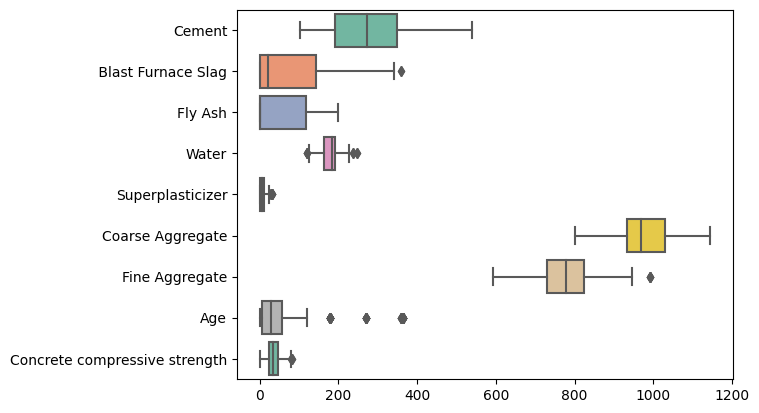

In [12]:
sns.boxplot(data=df,orient='h',palette="Set2").set_yticklabels(['Cement', ' Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer','Coarse Aggregate','Fine Aggregate','Age','Concrete compressive strength'])
plt.savefig('Plot_2.eps')

* We can see that outilers are present for the variables
    + Blast Furnace Slag
    + Water
    + Superplasticizer
    + Fine Aggregate
    + Age
    + Concrete compressive strength
* There are some variables like below which are skewed.
    + Blast Furnace Slag
    + Fly Ash 
    + Age
    + Superplasticizer


## Splitting the dataset for training and testing purpose

Here, we have put 80% of randomly selected observations into train dataset and rest into test dataset.

In [13]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [14]:
Y=df.iloc[:,8]
X=df.iloc[:,:-1]
X=sm.add_constant(X)
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [15]:
X_train

,const,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
612,1.0,277.00,0.00,0.00,191.00,0.00,968.0,856.00,28
525,1.0,359.00,19.00,141.00,154.00,10.91,942.0,801.00,3
597,1.0,272.80,181.90,0.00,185.70,0.00,1012.4,714.30,28
846,1.0,366.00,187.00,0.00,191.00,7.00,824.0,757.00,28
259,1.0,212.57,0.00,100.39,159.35,10.37,1003.8,903.79,3
...,...,...,...,...,...,...,...,...,...
960,1.0,284.00,119.70,0.00,168.30,7.20,970.4,794.20,28
847,1.0,280.00,129.00,100.00,172.00,9.00,825.0,805.00,28
715,1.0,141.30,212.00,0.00,203.50,0.00,971.8,748.50,90
905,1.0,135.00,0.00,166.00,180.00,10.00,961.0,805.00,28


## Fitting a model with all the regressors

In [16]:
model=sm.OLS(Y_train,X_train)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                           OLS Regression Results                                           
============================================================================================================
Dep. Variable:     Concrete compressive strength(MPa, megapascals)    R-squared:                       0.634
Model:                                                          OLS   Adj. R-squared:                  0.630
Method:                                               Least Squares   F-statistic:                     176.2
Date:                                              Wed, 06 Sep 2023   Prob (F-statistic):          5.33e-172
Time:                                                      19:53:07   Log-Likelihood:                -3080.6
No. Observations:                                               824   AIC:                             6179.
Df Residuals:                                                   815   BIC:                             6222.
Df Model:                                                         8                                         
Covariance Type:                                          nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                   -26.4498     28.568     -0.926      0.355     -82.526      29.627
Cement (component 1)(kg in a m^3 mixture)                 0.1242      0.009     13.487      0.000       0.106       0.142
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     0.1076      0.011      9.823      0.000       0.086       0.129
Fly Ash (component 3)(kg in a m^3 mixture)                0.0913      0.014      6.670      0.000       0.064       0.118
Water  (component 4)(kg in a m^3 mixture)                -0.1384      0.043     -3.235      0.001      -0.222      -0.054
Superplasticizer (component 5)(kg in a m^3 mixture)       0.3605      0.104      3.468      0.001       0.156       0.565
Coarse Aggregate  (component 6)(kg in a m^3 mixture)      0.0171      0.010      1.690      0.091      -0.003       0.037
Fine Aggregate (component 7)(kg in a m^3 mixture)         0.0198      0.012      1.699      0.090      -0.003       0.043
Age (day)                                                 0.1201      0.006     19.601      0.000       0.108       0.132
==============================================================================
Omnibus:                        9.850   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                9.830
Skew:                          -0.256   Prob(JB):                      0.00733
Kurtosis:                       3.156   Cond. No.                     1.04e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Checking multicolinearity

For that we have to first standardize all the variables

In [17]:

from sklearn.preprocessing import StandardScaler
X=StandardScaler().fit_transform(X_train.iloc[:,1:])


## Using VIF method

In [18]:
vif = pd.DataFrame()
vif['variable'] = X_train.iloc[:,1:].columns
vif['VIF'] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif

,variable,VIF
0,Cement (component 1)(kg in a m^3 mixture),7.285378
1,Blast Furnace Slag (component 2)(kg in a m^3 m...,6.892801
2,Fly Ash (component 3)(kg in a m^3 mixture),6.084812
3,Water (component 4)(kg in a m^3 mixture),6.327040
4,Superplasticizer (component 5)(kg in a m^3 mix...,2.851178
5,Coarse Aggregate (component 6)(kg in a m^3 mi...,4.833484
6,Fine Aggregate (component 7)(kg in a m^3 mixture),6.558222
7,Age (day),1.083763


As there are some variables for which VIF value is >5, as a thumb rule we can say that they are the set of variables which are involved in multicolinearity

## Variance Decomposition Method 

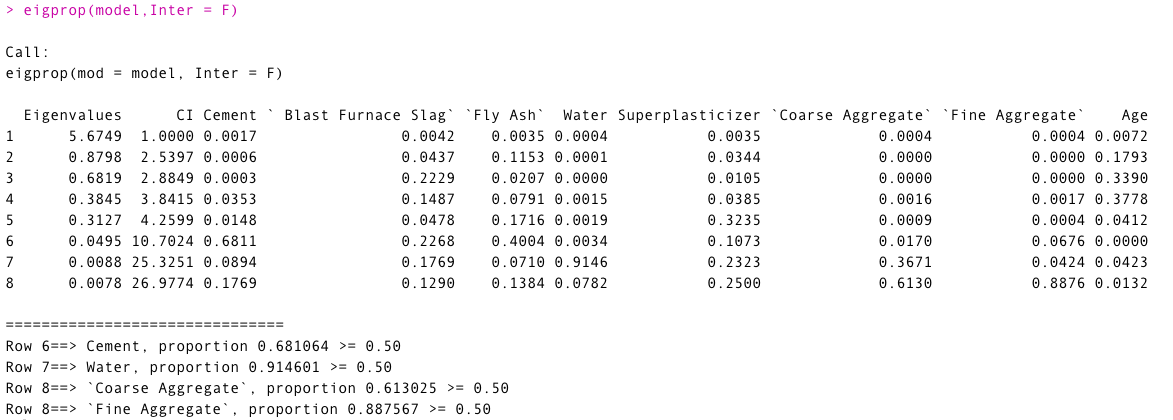

As condition index is > 15 for eigen values 0.0088 and 0.0078 and there are two variables - "Coarse Aggregate" and "Fine Aggregate" for which the proportions of variances of the estimators of those two variables contributed by eigen value 0.0078 are >0.5. 
So, we will drop either of those two variables and go for VIF method again. 

In [19]:
X=StandardScaler().fit_transform(X_train.iloc[:,[1,2,3,4,5,6,8]])

Here we have dropped the variable "Fine Aggregate". 

Again VIF Method

In [20]:

vif = pd.DataFrame()
vif['variable'] = X_train.iloc[:,[1,2,3,4,5,6,8]].columns
vif['VIF'] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif

,variable,VIF
0,Cement (component 1)(kg in a m^3 mixture),1.926272
1,Blast Furnace Slag (component 2)(kg in a m^3 m...,1.938587
2,Fly Ash (component 3)(kg in a m^3 mixture),2.402023
3,Water (component 4)(kg in a m^3 mixture),2.269540
4,Superplasticizer (component 5)(kg in a m^3 mix...,2.808492
5,Coarse Aggregate (component 6)(kg in a m^3 mi...,1.596679
6,Age (day),1.081899


Here, all the VIF's are <5. 
So, we can say that now our regressors are almost free from multicolinearity.

### Fitting model with those regressors

In [21]:
model=sm.OLS(Y_train,X_train.iloc[:,[0,1,2,3,4,5,6,8]])
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                           OLS Regression Results                                           
============================================================================================================
Dep. Variable:     Concrete compressive strength(MPa, megapascals)    R-squared:                       0.632
Model:                                                          OLS   Adj. R-squared:                  0.629
Method:                                               Least Squares   F-statistic:                     200.5
Date:                                              Wed, 06 Sep 2023   Prob (F-statistic):          1.53e-172
Time:                                                      19:54:49   Log-Likelihood:                -3082.1
No. Observations:                                               824   AIC:                             6180.
Df Residuals:                                                   816   BIC:                             6218.
Df Model:                                                         7                                         
Covariance Type:                                          nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                    19.2458      9.661      1.992      0.047       0.282      38.210
Cement (component 1)(kg in a m^3 mixture)                 0.1108      0.005     23.367      0.000       0.101       0.120
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     0.0919      0.006     15.787      0.000       0.080       0.103
Fly Ash (component 3)(kg in a m^3 mixture)                0.0732      0.009      8.503      0.000       0.056       0.090
Water  (component 4)(kg in a m^3 mixture)                -0.1967      0.026     -7.664      0.000      -0.247      -0.146
Superplasticizer (component 5)(kg in a m^3 mixture)       0.3389      0.103      3.281      0.001       0.136       0.542
Coarse Aggregate  (component 6)(kg in a m^3 mixture)      0.0030      0.006      0.520      0.603      -0.008       0.014
Age (day)                                                 0.1197      0.006     19.525      0.000       0.108       0.132
==============================================================================
Omnibus:                        9.112   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                9.076
Skew:                          -0.251   Prob(JB):                       0.0107
Kurtosis:                       3.109   Cond. No.                     2.81e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Stepwise Selection method 

There are three techniques - 'forward', 'backward' and 'both'.
We have used 'both'.

In [22]:
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [23]:
#Define Sequential Forward Selection (sfs)
sffs = SFS(LinearRegression(),
           k_features=5,
           forward=True,
           floating=True,
           scoring = 'r2',
           cv = 0)

In [25]:
#Use SFS to select the top 5 features 
feature_names=X_train.iloc[:,[1,2,3,4,5,6,8]].columns
sffs.fit(X_train.iloc[:,[1,2,3,4,5,6,8]], Y_train)

SequentialFeatureSelector(cv=0, estimator=LinearRegression(), floating=True,
                          k_features=(5, 5), scoring='r2')

In [26]:
#Create a dataframe for the SFS results 
df_SFFS_results = pd.DataFrame(sffs.subsets_).transpose()
df_SFFS_results

,feature_idx,cv_scores,avg_score,feature_names
1,"(0,)",[0.24656017904433702],0.24656,"(Cement (component 1)(kg in a m^3 mixture),)"
2,"(0, 4)",[0.360860352644516],0.36086,"(Cement (component 1)(kg in a m^3 mixture), Su..."
3,"(0, 4, 6)",[0.494192378370946],0.494192,"(Cement (component 1)(kg in a m^3 mixture), Su..."
4,"(0, 1, 4, 6)",[0.5711713002261328],0.571171,"(Cement (component 1)(kg in a m^3 mixture), Bl..."
5,"(0, 1, 3, 4, 6)",[0.5997981317647458],0.599798,"(Cement (component 1)(kg in a m^3 mixture), Bl..."


### Model after performing stepwise selection

In [27]:
model=sm.OLS(Y_train,X_train.iloc[:,[0,1,2,4,5,8]])
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                           OLS Regression Results                                           
============================================================================================================
Dep. Variable:     Concrete compressive strength(MPa, megapascals)    R-squared:                       0.600
Model:                                                          OLS   Adj. R-squared:                  0.597
Method:                                               Least Squares   F-statistic:                     245.2
Date:                                              Wed, 06 Sep 2023   Prob (F-statistic):          6.25e-160
Time:                                                      20:03:35   Log-Likelihood:                -3117.1
No. Observations:                                               824   AIC:                             6246.
Df Residuals:                                                   818   BIC:                             6274.
Df Model:                                                         5                                         
Covariance Type:                                          nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                    30.5613      4.707      6.492      0.000      21.322      39.801
Cement (component 1)(kg in a m^3 mixture)                 0.0854      0.004     22.961      0.000       0.078       0.093
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     0.0627      0.005     13.621      0.000       0.054       0.072
Water  (component 4)(kg in a m^3 mixture)                -0.1817      0.024     -7.649      0.000      -0.228      -0.135
Superplasticizer (component 5)(kg in a m^3 mixture)       0.7290      0.084      8.634      0.000       0.563       0.895
Age (day)                                                 0.1140      0.006     17.960      0.000       0.102       0.126
==============================================================================
Omnibus:                        3.545   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                3.447
Skew:                          -0.157   Prob(JB):                        0.178
Kurtosis:                       3.043   Cond. No.                     4.48e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Cheking if heteroscedasticity present or not

In [28]:
def abline(slope, intercept):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

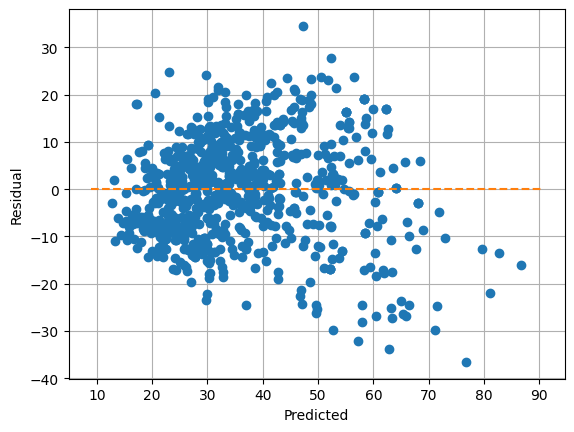

In [29]:
y_train_pred=model.fit().fittedvalues
y_train_res=model.fit().resid

plt.plot(y_train_pred,y_train_res,'o')
abline(0,0)
plt.grid()
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.savefig('Plot_3.eps')

As the predicted values increase, the residuals doesn't vary significantly in our case.
So, we can say that errors are homoscedastic.

## Checking if any higher order term is needed

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


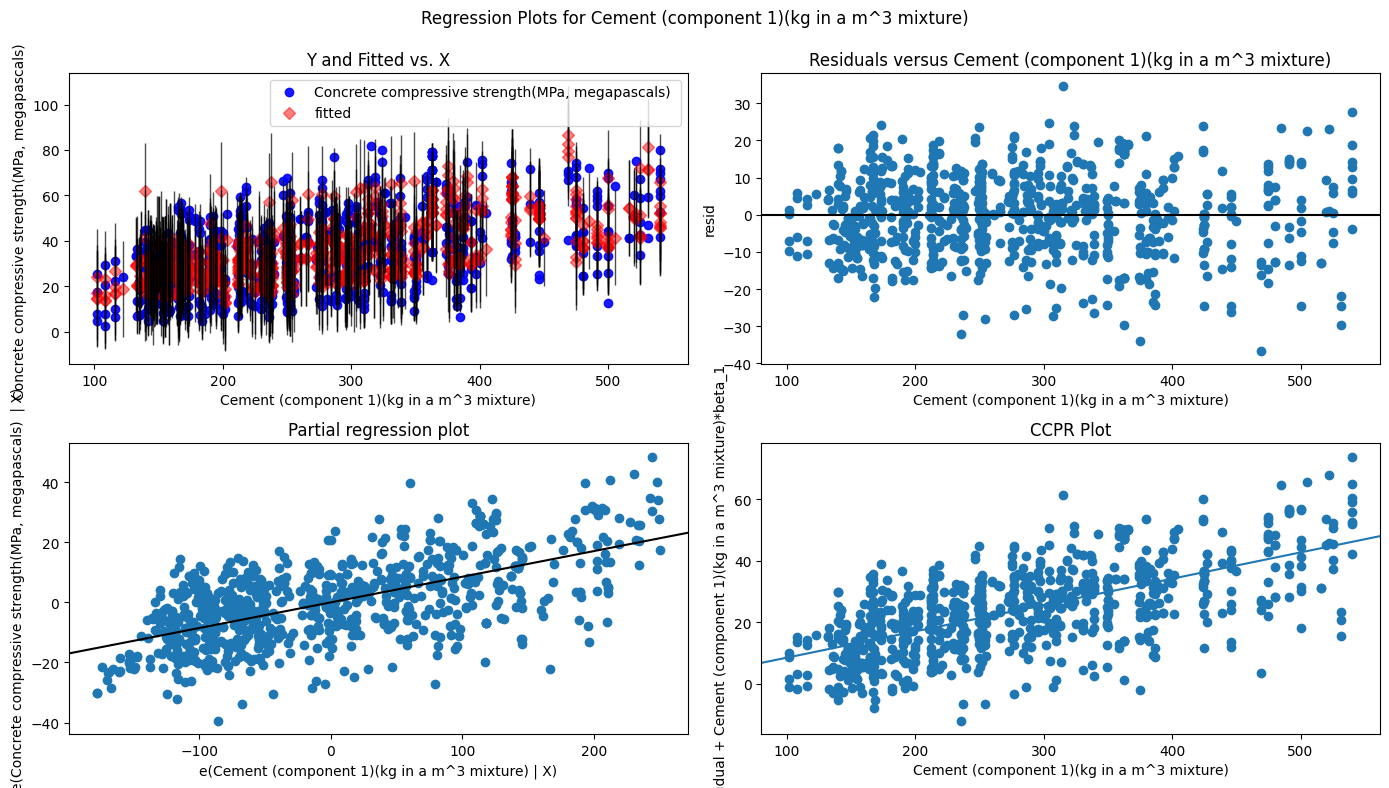

In [36]:
from statsmodels.formula.api import ols

# modify figure size
fig = plt.figure(figsize=(14, 8))
  
# creating regression plots
fig = sm.graphics.plot_regress_exog(model.fit(),'Cement (component 1)(kg in a m^3 mixture)',fig=fig)
plt.savefig('Plot_4.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


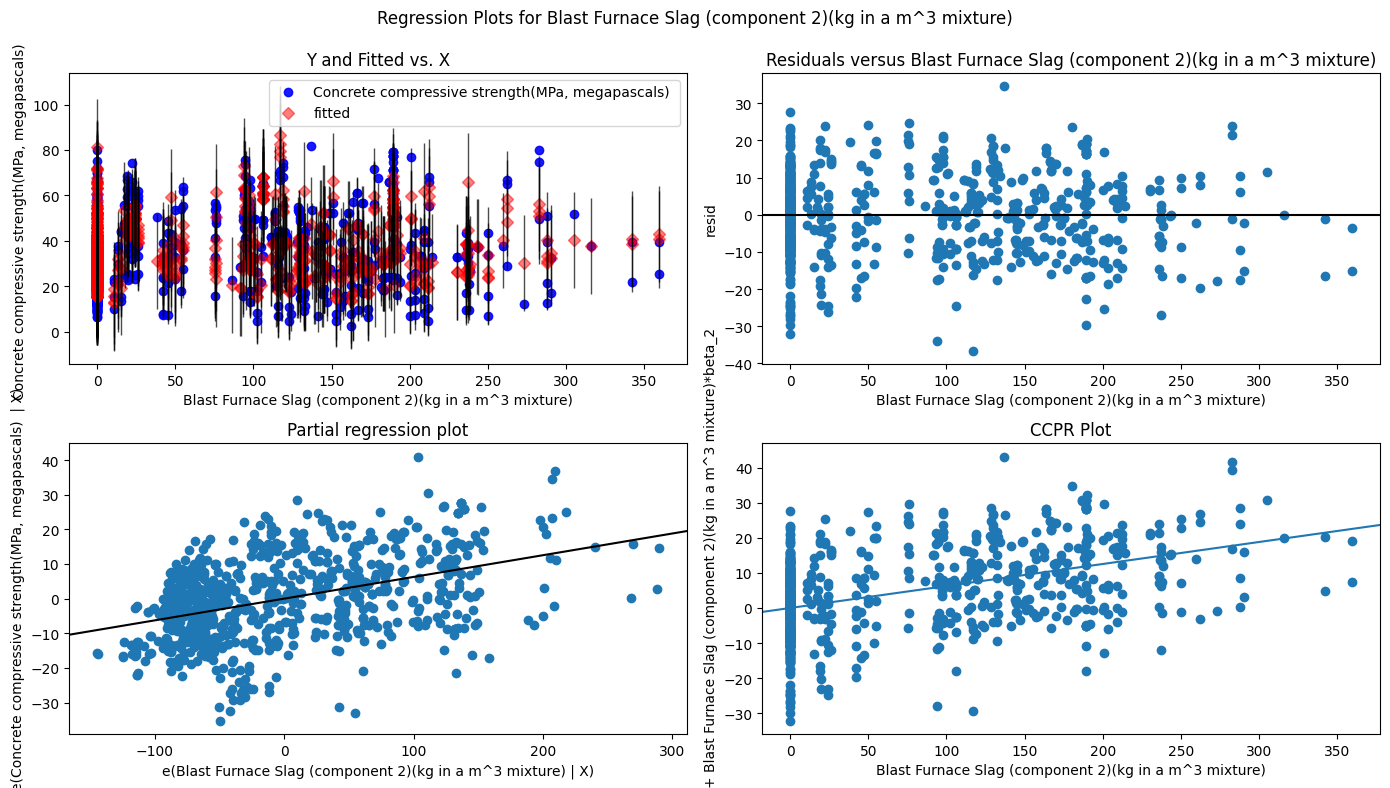

In [35]:
# modify figure size
fig = plt.figure(figsize=(14, 8))
  
# creating regression plots
fig = sm.graphics.plot_regress_exog(model.fit(),'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',fig=fig)
plt.savefig('Plot_5.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


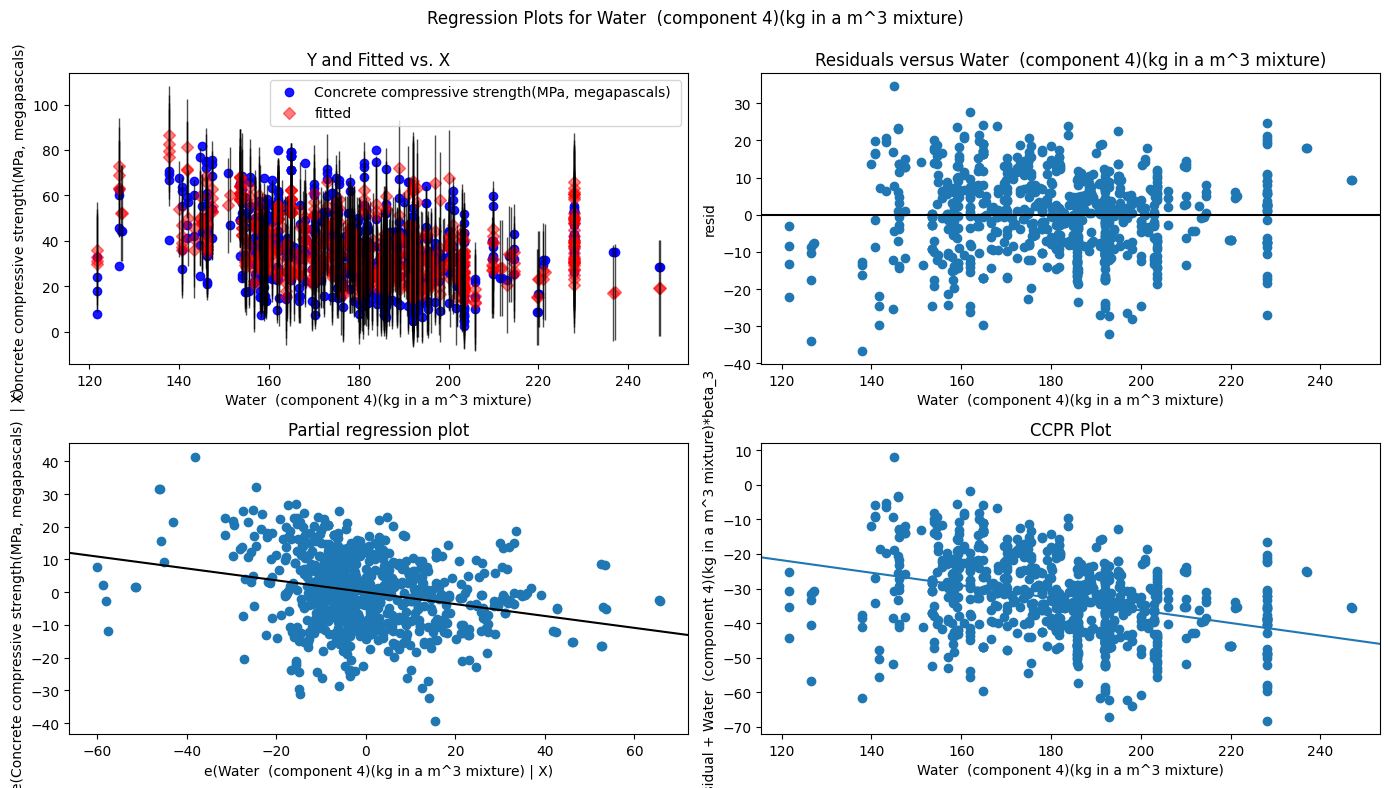

In [37]:
# modify figure size
fig = plt.figure(figsize=(14, 8))
  
# creating regression plots
fig = sm.graphics.plot_regress_exog(model.fit(),'Water  (component 4)(kg in a m^3 mixture)',fig=fig)
plt.savefig('Plot_6.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


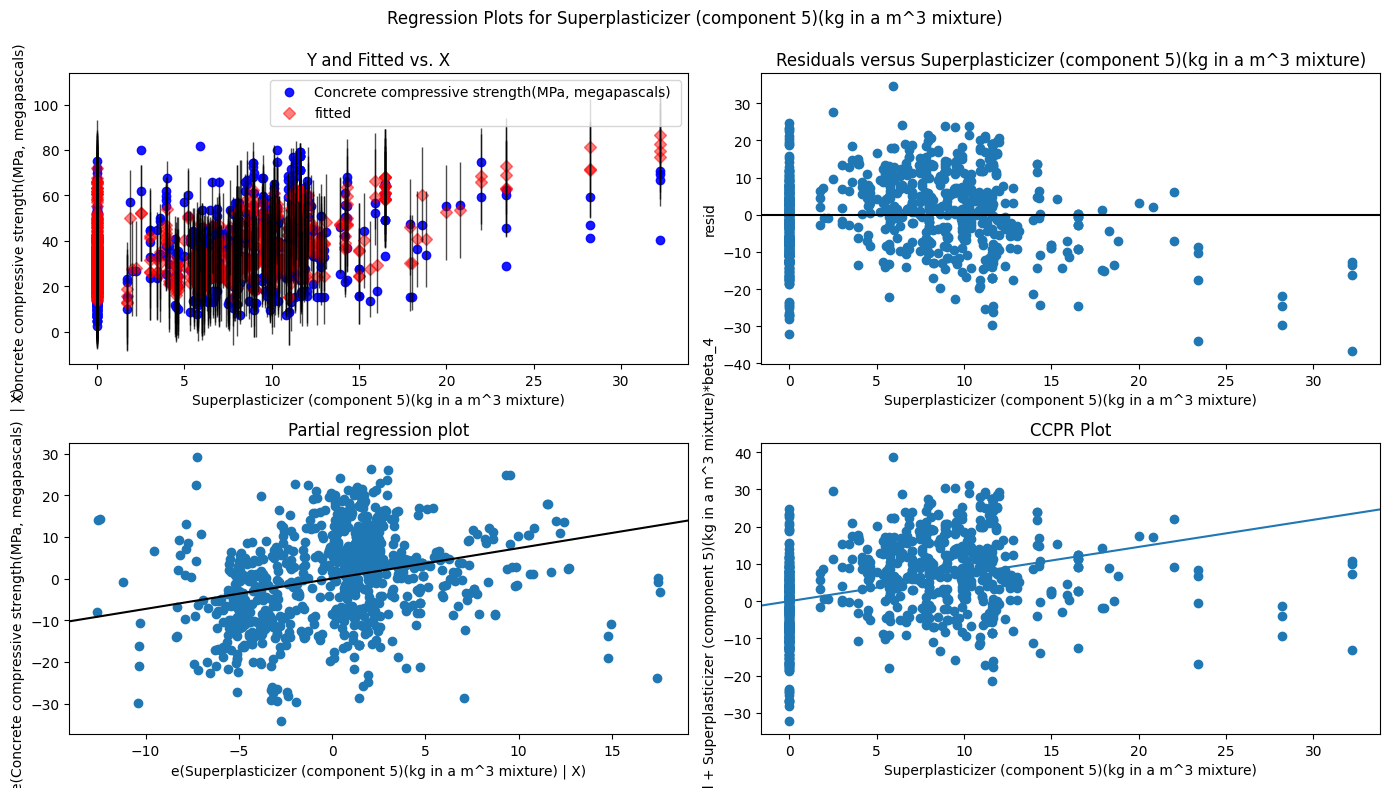

In [38]:
# modify figure size
fig = plt.figure(figsize=(14, 8))
  
# creating regression plots
fig = sm.graphics.plot_regress_exog(model.fit(),'Superplasticizer (component 5)(kg in a m^3 mixture)',fig=fig)
plt.savefig('Plot_7.eps')


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


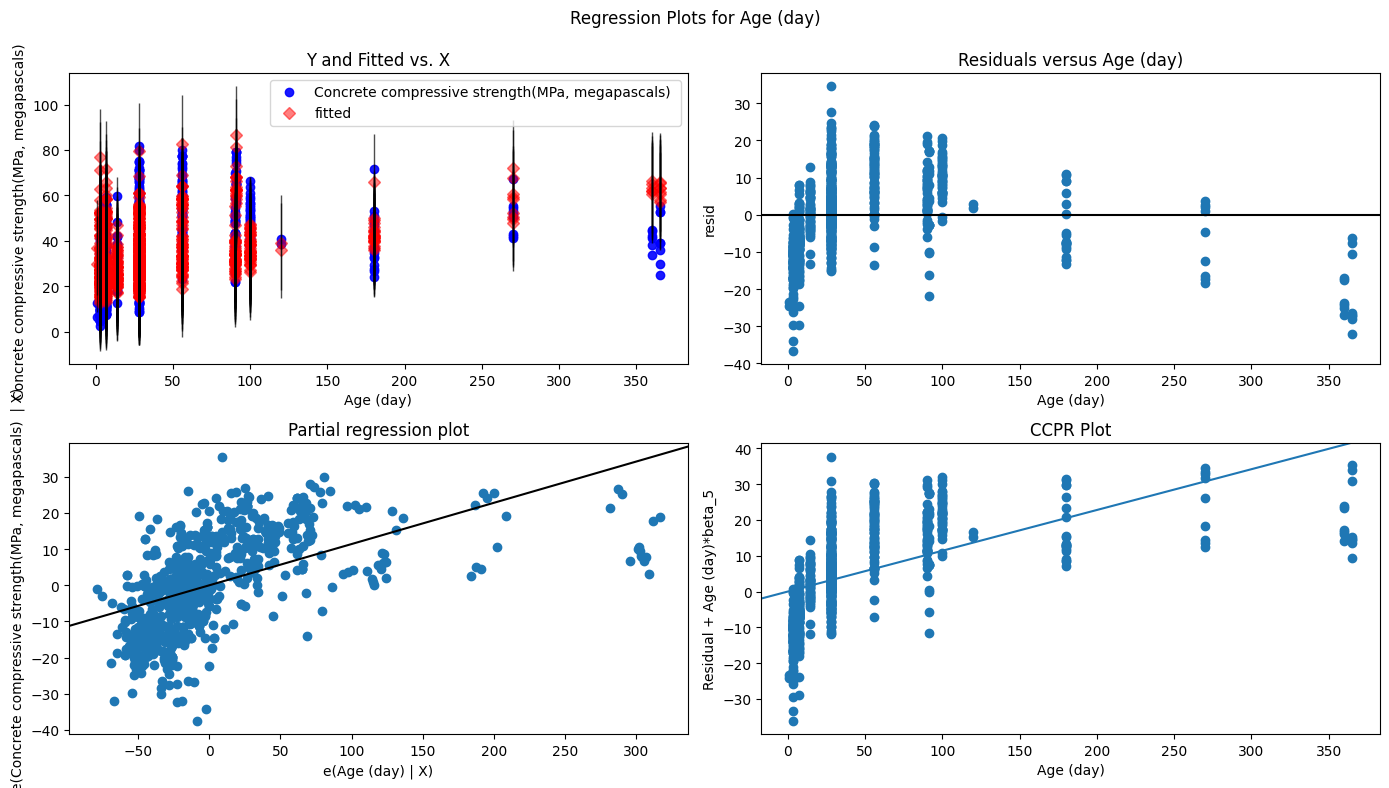

In [39]:
# modify figure size
fig = plt.figure(figsize=(14, 8))
  
# creating regression plots
fig = sm.graphics.plot_regress_exog(model.fit(),'Age (day)',fig=fig)
plt.savefig('Plot_8.eps')

From the plots of "regressors vs Residuals" we can conclude that there is no higher order term involved in the model. 

## Checking of normality assumption

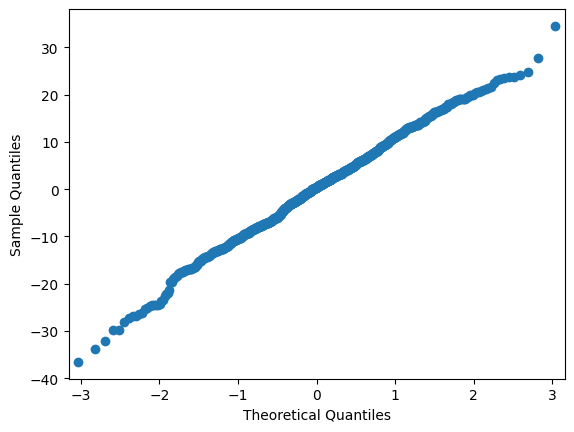

In [40]:
sm.qqplot(model.fit().resid)
plt.savefig('Plot_9.eps')

## Predicted response for test dataset and checking the accuracy of our prediction

In [41]:
from sklearn.metrics import r2_score

obs_pred=pd.DataFrame()
obs_pred['Observed']=Y_test
obs_pred['Predicted']=model.fit().predict(X_test.iloc[:,[0,1,2,4,5,8]])
print(obs_pred)
print("R-squared value is : ",r2_score(Y_test,model.fit().predict(X_test.iloc[:,[0,1,2,4,5,8]])))

      Observed  Predicted
339  21.911547  31.468704
244  19.932751  22.426155
882  36.438807  22.808899
567  11.957582  23.504201
923  39.844818  28.604882
..         ...        ...
258  42.919881  37.519672
551   8.204075  17.800695
528  38.610656  43.191801
812  34.680643  32.419564
50   39.779318  46.990756

[206 rows x 2 columns]
R-squared value is :  0.49928116001908207


We can see that 50% of the variability of response variable has been explained by the regression model.